In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import os
os.chdir('./code')

import RF_classification, myplots


## Load the data 

In [3]:
# Read data from the 3 data files
data_train = pd.read_csv("../data/datatraining.txt")
data_test = pd.read_csv("../data/datatest.txt")
data_test2 = pd.read_csv("../data/datatest2.txt")

# Convert the date column into pandas datatime
for df in [data_train, data_test, data_test2]:
    df['date'] = pd.to_datetime(df['date'])

# Concatenate dataframes from the three data files
mydata = pd.concat([data_train, data_test, data_test2], axis = 0)
mydata = mydata.sort_values(by=['date']).set_index('date')
display(mydata)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1


In [4]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20560 entries, 2015-02-02 14:19:00 to 2015-02-18 09:19:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    20560 non-null  float64
 1   Humidity       20560 non-null  float64
 2   Light          20560 non-null  float64
 3   CO2            20560 non-null  float64
 4   HumidityRatio  20560 non-null  float64
 5   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.1 MB
None


In [5]:
mydata.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


## Plot the combined data 

/var/folders/kq/138ykpgn1_1bg7ryj7sh0_ym0000gn/T/ipykernel_34937/1124256965.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


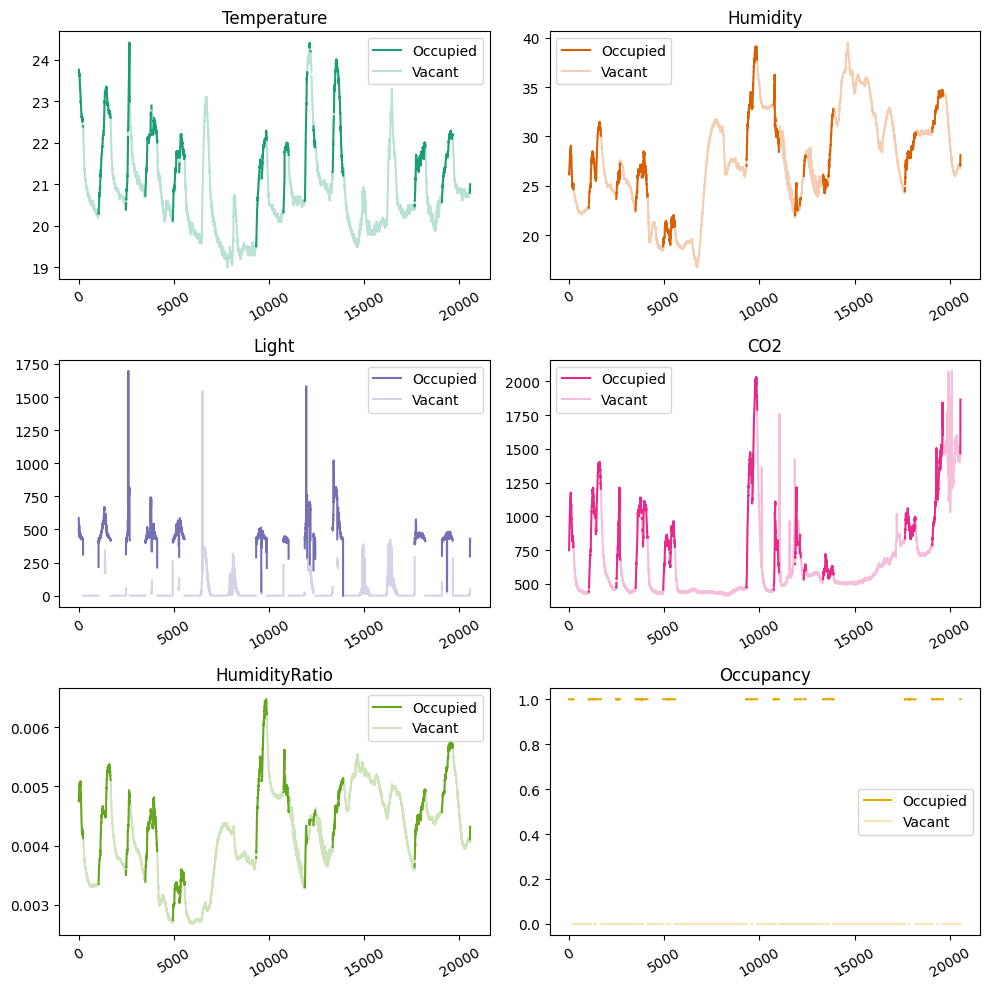

In [7]:
fig, axes = plt.subplots(3, 2)
fig.set_figheight(10)
fig.set_figwidth(10)

colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']

for i , ax in enumerate(axes.flatten()):
    ax.plot(np.where(mydata.Occupancy==1, mydata[mydata.columns[i]], None), label='Occupied', color = colors[i])
    ax.plot(np.where(mydata.Occupancy==0, mydata[mydata.columns[i]], None), label='Vacant', color = colors[i], alpha = 0.3)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    ax.set_title(mydata.columns[i])
    ax.legend()

fig.tight_layout()
fig.savefig('../figures/data_exploration.png')
plt.show()

## Correlation Plot

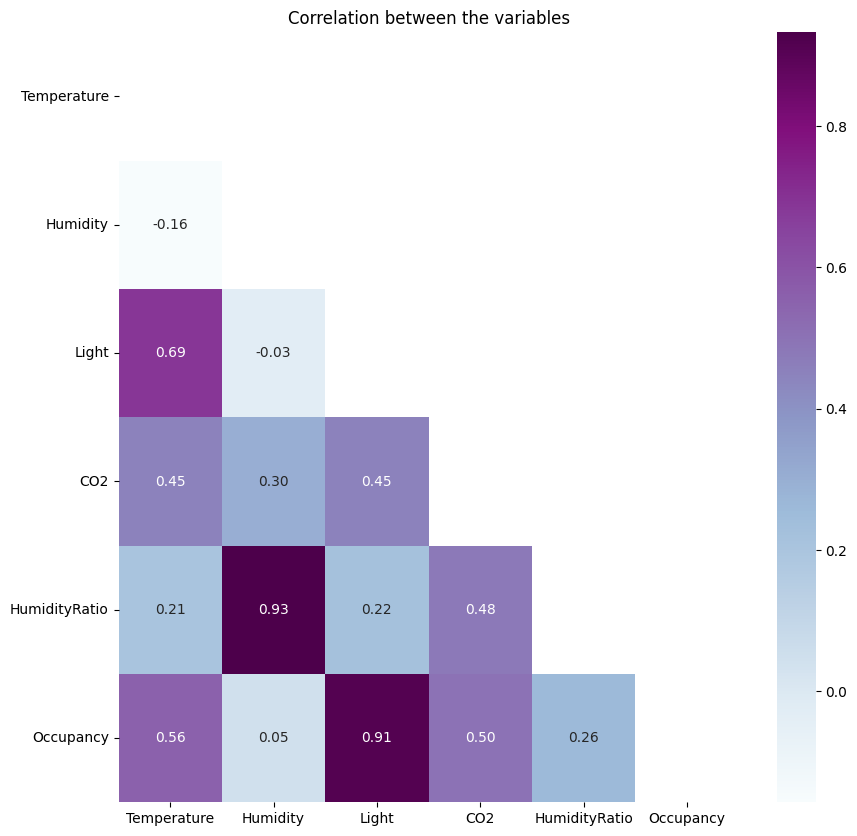

In [8]:
mask = np.triu(np.ones_like(mydata.corr()))
plt.figure(figsize = (10,10))
sns.heatmap(mydata.corr(),annot=True, fmt="1.2f", mask=mask, cmap="BuPu")
plt.yticks(rotation=0)
plt.title('Correlation between the variables')
plt.savefig('../figures/correlation_plot.png')
plt.show()

In [59]:
df = mydata[['Temperature' , 'CO2', 'Humidity', 'Occupancy']]
display(df)

,Temperature,CO2,Humidity,Occupancy
date,,,,
2015-02-02 14:19:00,23.7000,749.200000,26.2720,1
2015-02-02 14:19:59,23.7180,760.400000,26.2900,1
2015-02-02 14:21:00,23.7300,769.666667,26.2300,1
2015-02-02 14:22:00,23.7225,774.750000,26.1250,1
2015-02-02 14:23:00,23.7540,779.000000,26.2000,1
...,...,...,...,...
2015-02-18 09:15:00,20.8150,1505.250000,27.7175,1
2015-02-18 09:16:00,20.8650,1514.500000,27.7450,1
2015-02-18 09:16:59,20.8900,1521.500000,27.7450,1


In [57]:
df.to_csv('../data/mydata.csv')

## Random Forest Classifier

In [60]:

Y_test, Y_pred, rf_score, predit_proba = RF_classification.rf_classification(df)


Accuracy of Random Forest Classifier on test set: 98.540856%


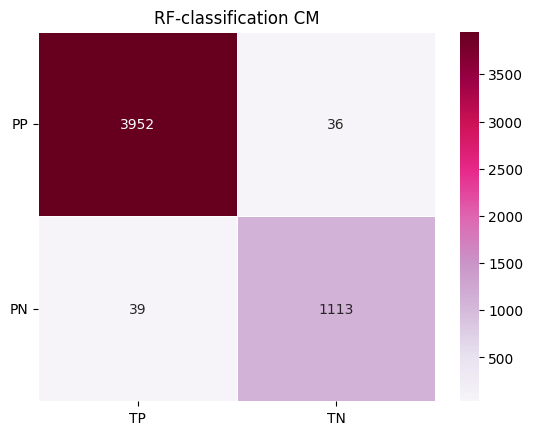

In [47]:
myplots.rf_cm(Y_test,Y_pred )

## Downsampling (50%)

Cut 50% of the data by resampling (assume we sample every 2 minutes instead of every minute)

In [48]:
df_ = df.resample('2T').mean()
df_50 = df_.fillna(method="ffill")
df_50['Occupancy'] = df_50['Occupancy'].round()

In [61]:
Y_test_50, Y_pred_50, rf_score_50, predit_proba_50 = RF_classification.rf_classification(df_50)


Accuracy of Random Forest Classifier on test set: 98.100598%


### Sample every one hour once  

## Baseline -- remove nan values 

In [67]:
df_ = df.resample('60T').mean()
df_hour = df_.dropna()
df_hour['Occupancy'] = df_hour['Occupancy'].round()

/var/folders/kq/138ykpgn1_1bg7ryj7sh0_ym0000gn/T/ipykernel_34937/872240523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hour['Occupancy'] = df_hour['Occupancy'].round()


In [68]:
Y_test_hour, Y_pred_hour, rf_score_hour, predit_proba_hour = RF_classification.rf_classification(df_hour)

Accuracy of Random Forest Classifier on test set: 90.804598%


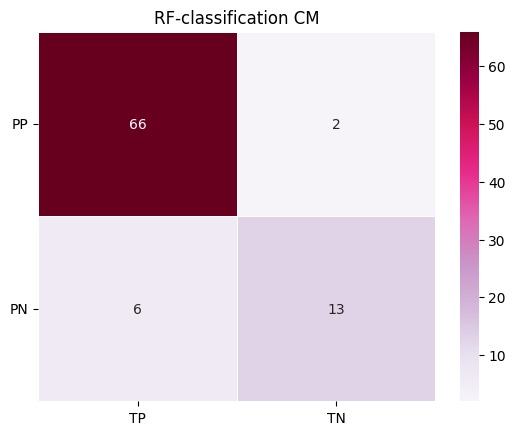

In [69]:
myplots.rf_cm(Y_test_hour,Y_pred_hour)

## Forward filling 

In [70]:
df_ = df.resample('60T').mean()
df_hour = df_.fillna(method="ffill")
df_hour['Occupancy'] = df_hour['Occupancy'].round()

In [71]:
Y_test_hour, Y_pred_hour, rf_score_hour, predit_proba_hour = RF_classification.rf_classification(df_hour)

Accuracy of Random Forest Classifier on test set: 91.578947%


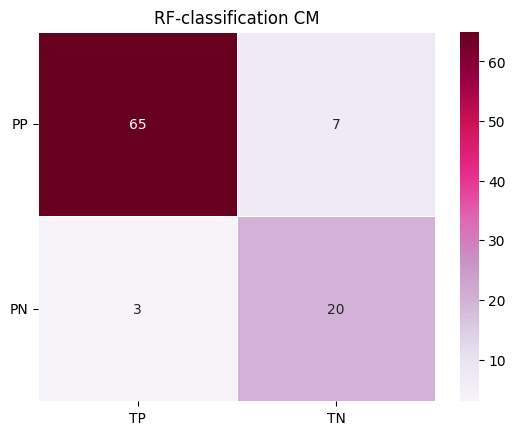

In [55]:
myplots.rf_cm(Y_test_hour,Y_pred_hour)